In [2]:
# 1. Проверка гипотез  о параметрах нормального распределения;
# alpha = 0.05; a_0 = 4; H_2 = a > a_0; sigma_0 = 1.8; H_3 = sigma < sigma_ 0;
# H_1: a = a_1 = 4.4; sigma_1 = 1.6; epsilon = 0.05; n = 100;

# 2. Последовательный критерий отношения правдоподобия;

# Лабораторная работа № 6-7 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

import math
import numpy as np
import scipy.stats as sci_stats
from typing import List, Callable
from matplotlib import pyplot as plt

In [3]:
data = [[3.151, 4.708, 3.454, 4.898, 4.821, 4.479, 5.468, 4.96, 5.787, 4.788],
        [6.526, 5.409, 5.151, 3.777, 3.738, 2.649, 6.063, 2.976, 2.386, 5.042],
        [4.67, 4.155, 4.37, 2.962, 5.456, 5.912, 6.214, 3.714, 2.791, 5.684],
        [4.918, 2.312, 5.094, 2.618, 3.377, 6.607, 5.13, 4.472, 4.488, 4.535],
        [5.236, 4.904, 0.724, 2.583, 6.142, 5.499, 4.042, 4.699, 7.054, 3.107],
        [2.822, 6.992, 1.63, 2.115, 2.822, 6.15, 5.382, 1.232, 5.321, 3.329],
        [3.062, 3.885, 3.993, 5.775, 4.6, 5.753, 2.912, 4.129, 2.856, 2.243],
        [4.777, 4.681, 3.762, 5.806, 3.645, 6.382, 5.483, 3.967, 3.384, 3.389],
        [4.66, 2.086, 4.593, 2.531, 6.352, 2.923, 6.732, 1.989, 3.867, 4.115],
        [6.913, 4.629, 5.259, 3.531, 4.596, 4.115, 4.824, 5.218, 4.256, 0.829]]

## 1 Часть задания

In [4]:
# "Спрямление" списка данных
def flatten(l):
    return [item for sublist in l for item in sublist]

size = len(flatten(data))
size

100

In [6]:
# Описание статистик над выборкой:
selective_mean = np.mean(flatten(data))
selective_var = np.var(flatten(data))
a_0 = 4

print(f"Выб. среднее: {selective_mean}\nВыб. дисперсия: {selective_var}\nПредполагаемый параметр: {a_0}")
print(f"с.к.о: {selective_var**(1/2)}")

Выб. среднее: 4.29997
Выб. дисперсия: 1.9871500091
Предполагаемый параметр: 4
с.к.о: 1.4096630835415958


In [7]:
# Пункт 1:
# Описание статистики критерия и вычисление квантиля распределения t-Стьюдента:

# H_0: a = a_0 = 4
# H_1: a > a_0 = 4 - правосторонняя гипотеза
t = (selective_mean - a_0) / (selective_var) ** (1/2) * (size) ** (1/2)
qt_t = sci_stats.t.ppf(q=.95, df=size-1)
selective_crit = qt_t * selective_var ** (1/2) / (size) ** (1/2) + a_0

print(f"Выборочное среднее = {selective_mean} принадлежит правосторонней альтернативе ({selective_crit}; +inf)")
print("Эквивалентно:")
print(f"Статистика t = {t} принадлежит правосторонней альтернативе [критическое множество] ({qt_t}; +inf)")
print("Вывод: А значит, гипотеза H_0 отвергается с уровнем значимости alpha=0.05")

Выборочное среднее = 4.29997 принадлежит правосторонней альтернативе (4.2340592116847064; +inf)
Эквивалентно:
Статистика t = 2.1279552788341762 принадлежит правосторонней альтернативе [критическое множество] (1.6603911559963895; +inf)
Вывод: А значит, гипотеза H_0 отвергается с уровнем значимости alpha=0.05


In [8]:
# Пункт 2:
# Описание статистики критерия и вычисление квантиля распределения Хи-квадрат:

# H_0: sigma = sigma_0 = 1.8
# H_1: sigma < sigma_0 = 1.8 - левосторонняя гипотеза
sigma = 1.8
z = selective_var * (size - 1) / (sigma ** 2)
qt_chi2 = sci_stats.chi2.ppf(q=.05, df=size-1)

print(f"Статистика z = {z} принадлежит левосторонней альтернативе [критическое множество] (-inf; {qt_chi2})")
print("Вывод: А значит, гипотеза H_0 отвергается с уровнем значимости alpha=0.05")

Статистика z = 60.71847250027777 принадлежит левосторонней альтернативе [критическое множество] (-inf; 77.04633186376029)
Вывод: А значит, гипотеза H_0 отвергается с уровнем значимости alpha=0.05


In [9]:
# Пункт 3:
selective_mean

4.29997

In [10]:
# Пункт 4:
sci_stats.norm.cdf(-0.85515)

0.1962340561624838

In [11]:
# Пункт 5:
sci_stats.norm.ppf(q=0.05)

-1.6448536269514729

In [12]:
# Данные для построения графиков:
flatten_data = flatten(data)
row_data = []
for i in range(10):
  for j in range(10):
    row_data.append(data[j][i])

print(row_data)

l = math.trunc(1 + np.log2(100))
a_0, a_1 = 4, 4.4
sigma_0, sigma_1 = 1.8, 1.6

x = np.linspace(min(flatten_data), max(flatten_data), 100)
y1 = sci_stats.norm.pdf(x, a_0, sigma_0)
y2 = sci_stats.norm.pdf(x, a_1, sigma_1)

[3.151, 6.526, 4.67, 4.918, 5.236, 2.822, 3.062, 4.777, 4.66, 6.913, 4.708, 5.409, 4.155, 2.312, 4.904, 6.992, 3.885, 4.681, 2.086, 4.629, 3.454, 5.151, 4.37, 5.094, 0.724, 1.63, 3.993, 3.762, 4.593, 5.259, 4.898, 3.777, 2.962, 2.618, 2.583, 2.115, 5.775, 5.806, 2.531, 3.531, 4.821, 3.738, 5.456, 3.377, 6.142, 2.822, 4.6, 3.645, 6.352, 4.596, 4.479, 2.649, 5.912, 6.607, 5.499, 6.15, 5.753, 6.382, 2.923, 4.115, 5.468, 6.063, 6.214, 5.13, 4.042, 5.382, 2.912, 5.483, 6.732, 4.824, 4.96, 2.976, 3.714, 4.472, 4.699, 1.232, 4.129, 3.967, 1.989, 5.218, 5.787, 2.386, 2.791, 4.488, 7.054, 5.321, 2.856, 3.384, 3.867, 4.256, 4.788, 5.042, 5.684, 4.535, 3.107, 3.329, 2.243, 3.389, 4.115, 0.829]


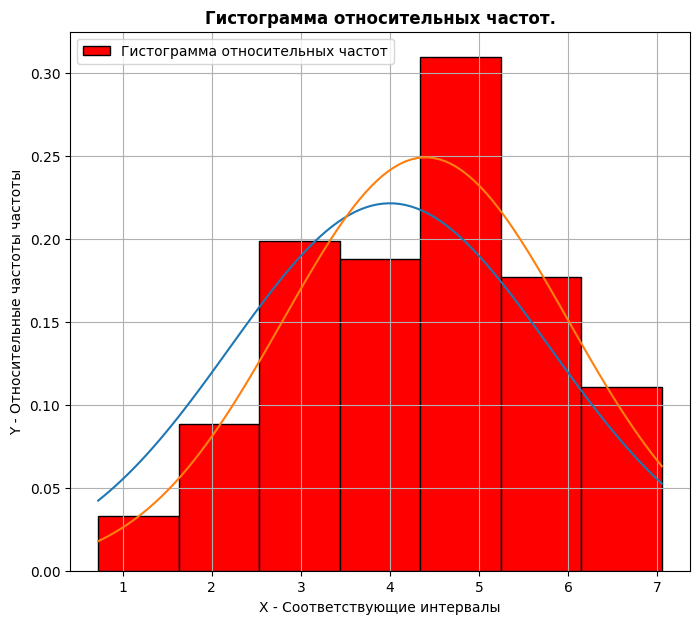

In [13]:
# Пункт 6:
# Настройки графика:
plt.figure(figsize=(8,7))
plt.grid()

# Построение графика:

# 1 график:
plt.hist(flatten_data,
         bins = l,
         density=True,
         color='red',
         edgecolor='black',
         label='Гистограмма относительных частот')

# 2 график:
plt.plot(x, y1)

# 2 график:
plt.plot(x, y2)

# Приписочки:
plt.title("Гистограмма относительных частот.", fontweight = 'bold')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Относительные частоты частоты')
plt.legend()

# Вывод графика:
plt.show()

## 2 Часть задания

In [14]:
# Параметры для построения Критерия Вальда:
alpha, beta = 0.05, 0.2
A = (1 - beta) / alpha
B = beta / (1  - alpha)

In [15]:
# Параметры распределения:
a_0, a_1, sigma_1 = 4, 4.4, 1.6

In [16]:
# Функция, определяющая критерий Вальда:
def product_function(X, n, a0, a1, sigma1):
    product = 1
    for index in range(n):
        product *= np.exp(X[index]*(a1 - a0)/(sigma1**2) + (a0**2 - a1**2)/(2 * sigma1**2))
    return product


In [17]:
# Значения функции, определяющей критерий Вальда:
information = []
for product_index in range(1, len(row_data) + 1):
    information.append(product_function(sorted(row_data), product_index, a_0, a_1, sigma_1))

In [18]:
# Аргументы критерия:
x = np.arange(1, 101)

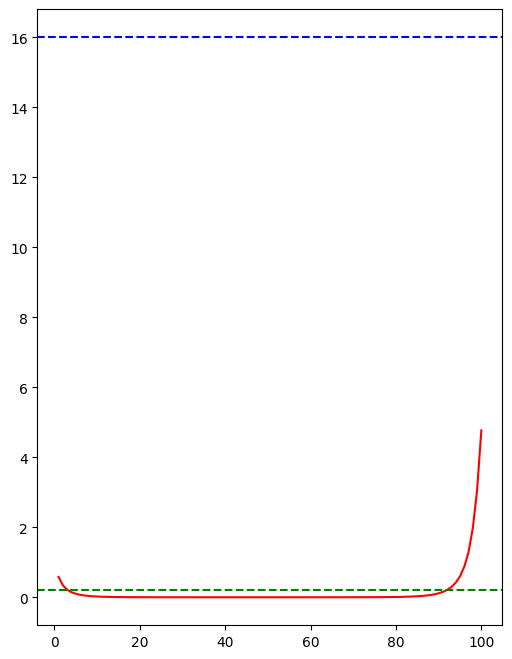

In [19]:
plt.figure(figsize=(6,8))
plt.plot(x, information, color = "r")
plt.axhline(y=B, color="g", linestyle = "--", label='B')
plt.axhline(y=A, color="b", linestyle = "--", label='A')
plt.show()

In [20]:
sci_stats.f.ppf(q=.95, dfn=119, dfd=149)

1.3289041988887698

In [21]:
sci_stats.norm.ppf(q=0.95)

1.6448536269514722

In [22]:
data_matrix = [[2, 9, 9, 20],
               [3, 6, 21, 30],
               [15, 15, 20, 50],
               [20, 30, 50, 100]]

n = 100


P_reg = [20/100, 30/100, 50/100]
P_color = [20/100, 30/100, 50/100]

# Посчитаем хи-квадрат_в

another_matrix = []
for elem_0 in P_reg:
  sub_data = []
  for elem_1 in P_color:
    sub_data.append(round(elem_0 * elem_1, 5))
  another_matrix.append(sub_data)

another_matrix

[[0.04, 0.06, 0.1], [0.06, 0.09, 0.15], [0.1, 0.15, 0.25]]

In [23]:
chi2_v = 0
for i in range(3):
  for j in range(3):
    chi2_v += (data_matrix[i][j] - n * another_matrix[i][j]) ** 2 / (n * another_matrix[i][j])

print(chi2_v)



# Посчитаем статистику chi_2:

sci_stats.chi2.ppf(q=.95, df=4)

11.0


9.487729036781154